In [3]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
#from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emilio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Emilio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
api_key = 'YOUR KEY'

In [29]:
channel_ids = ['UC8butISFwT-Wl7EV0hUK0BQ',]

In [6]:
api_service_name = "youtube"
api_version = "v3"

# Create an API client

youtube = build(
    api_service_name, api_version, developerKey=api_key)


In [9]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [10]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,sentdex,1140000,103398120,1252,UUfzlCWGWYyIQ0aLC5w48gBQ
1,freeCodeCamp.org,5970000,395697632,1330,UU8butISFwT-Wl7EV0hUK0BQ


In [30]:
playlist_id = "UU8butISFwT-Wl7EV0hUK0BQ"

In [31]:
# Get video IDs

video_ids = get_video_ids(youtube, playlist_id)

In [32]:
len(video_ids)

1330

In [33]:
# Get video details

video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,hQBwCWtXkK0,freeCodeCamp.org,Create An Elementor WordPress Website – Elemen...,In this full Elementor WordPress course for be...,None,2022-07-25T12:54:48Z,19716,746,None,41,PT1H22M1S,hd,false
1,J-cSy5MeMOA,freeCodeCamp.org,Apache Cassandra Database – Full Course for Be...,Apache Cassandra is an open source NoSQL distr...,"[database, nosql, Cassandra, apache cassandra,...",2022-07-21T13:06:38Z,37511,1193,None,75,PT1H8M40S,hd,false
2,OIc7urJC0zY,freeCodeCamp.org,Think Like a Computer Science Professor,See how to think like a computer science profe...,None,2022-07-20T14:31:03Z,68166,3038,None,175,PT12H48M12S,hd,false
3,ChTGbmR2NeM,freeCodeCamp.org,How to Build an MVP for Your App – Full Course...,Learn how to build a Minimum Viable Product (M...,None,2022-07-19T13:32:32Z,50479,1548,None,63,PT1H14M21S,hd,false
4,Reny0cTTv24,freeCodeCamp.org,React JS Tutorial – Build a Weather App With C...,"In this React project tutorial, you will learn...",None,2022-07-14T13:11:30Z,87419,2869,None,175,PT1H35M59S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,_uWzpyr_5qk,freeCodeCamp.org,Computer Basics 5: How To Measure Data Size,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17T08:31:23Z,41540,None,None,27,PT2M24S,hd,false
1326,xXLj5MbrI44,freeCodeCamp.org,Computer Basics 4: Decoding a Binary Number,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17T08:31:20Z,53108,None,None,27,PT1M42S,hd,true
1327,veugT7A9psY,freeCodeCamp.org,Computer Basics 3: Intro to Binary Code,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17T08:31:17Z,46843,None,None,9,PT1M,hd,true
1328,xj9mFD71Vfc,freeCodeCamp.org,Computer Basics 2: More Computer Hardware,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17T08:31:14Z,52936,None,None,12,PT1M12S,hd,true


## Data pre-processing

In [34]:
# Check for NULL values

video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [35]:
# Check data types

video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [36]:
# Convert count columns to numeric

numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [37]:
# Publish day in the week

video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [38]:
# convert duration to seconds

import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [39]:
video_df[['durationSecs', 'duration']] 

,durationSecs,duration
0,4921.0,PT1H22M1S
1,4120.0,PT1H8M40S
2,46092.0,PT12H48M12S
3,4461.0,PT1H14M21S
4,5759.0,PT1H35M59S
...,...,...
1325,144.0,PT2M24S
1326,102.0,PT1M42S
1327,60.0,PT1M
1328,72.0,PT1M12S


In [40]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [41]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,hQBwCWtXkK0,freeCodeCamp.org,Create An Elementor WordPress Website – Elemen...,In this full Elementor WordPress course for be...,None,2022-07-25 12:54:48+00:00,19716.0,746.0,NaN,41.0,PT1H22M1S,hd,false,Monday,4921.0,0
1,J-cSy5MeMOA,freeCodeCamp.org,Apache Cassandra Database – Full Course for Be...,Apache Cassandra is an open source NoSQL distr...,"[database, nosql, Cassandra, apache cassandra,...",2022-07-21 13:06:38+00:00,37511.0,1193.0,NaN,75.0,PT1H8M40S,hd,false,Thursday,4120.0,11
2,OIc7urJC0zY,freeCodeCamp.org,Think Like a Computer Science Professor,See how to think like a computer science profe...,None,2022-07-20 14:31:03+00:00,68166.0,3038.0,NaN,175.0,PT12H48M12S,hd,false,Wednesday,46092.0,0
3,ChTGbmR2NeM,freeCodeCamp.org,How to Build an MVP for Your App – Full Course...,Learn how to build a Minimum Viable Product (M...,None,2022-07-19 13:32:32+00:00,50479.0,1548.0,NaN,63.0,PT1H14M21S,hd,false,Tuesday,4461.0,0
4,Reny0cTTv24,freeCodeCamp.org,React JS Tutorial – Build a Weather App With C...,"In this React project tutorial, you will learn...",None,2022-07-14 13:11:30+00:00,87419.0,2869.0,NaN,175.0,PT1H35M59S,hd,false,Thursday,5759.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,_uWzpyr_5qk,freeCodeCamp.org,Computer Basics 5: How To Measure Data Size,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17 08:31:23+00:00,41540.0,NaN,NaN,27.0,PT2M24S,hd,false,Friday,144.0,22
1326,xXLj5MbrI44,freeCodeCamp.org,Computer Basics 4: Decoding a Binary Number,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17 08:31:20+00:00,53108.0,NaN,NaN,27.0,PT1M42S,hd,true,Friday,102.0,22
1327,veugT7A9psY,freeCodeCamp.org,Computer Basics 3: Intro to Binary Code,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17 08:31:17+00:00,46843.0,NaN,NaN,9.0,PT1M,hd,true,Friday,60.0,19
1328,xj9mFD71Vfc,freeCodeCamp.org,Computer Basics 2: More Computer Hardware,http://FreeCodeCamp.com is a community of busy...,"[Free Code Camp, JavaScript, Pair Programming,...",2015-07-17 08:31:14+00:00,52936.0,NaN,NaN,12.0,PT1M12S,hd,true,Friday,72.0,20


## EDA

### Best performing videos

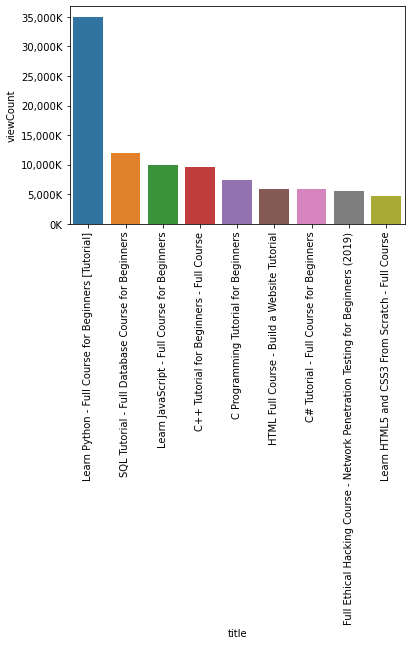

In [42]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Worst performing videos

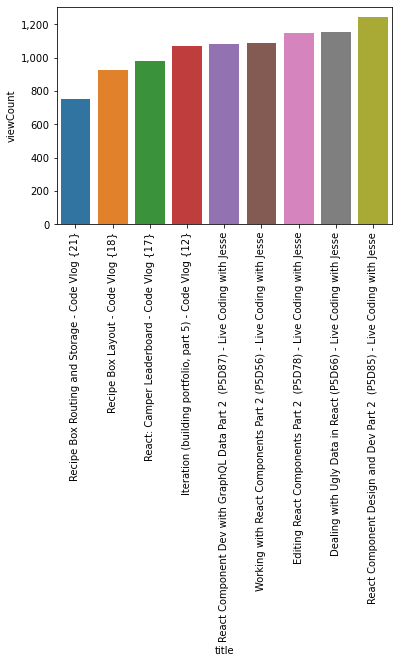

In [43]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x)))

### View distribution per video

C:\Users\Emilio\Anaconda3\envs\YT-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='channelTitle', ylabel='viewCount'>

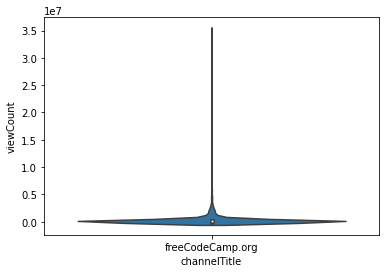

In [44]:
sns.violinplot(video_df['channelTitle'], video_df['viewCount'])

### Views vs. likes and comments

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

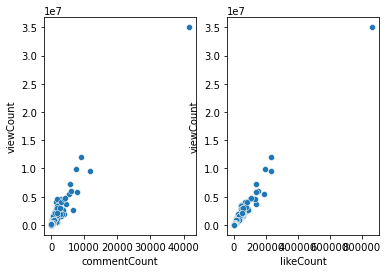

In [45]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

### Video duration

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

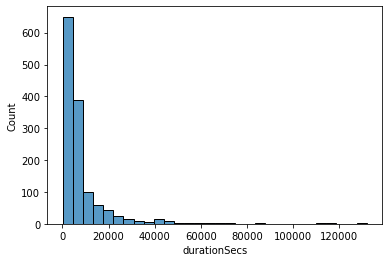

In [48]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

### Wordcloud for video titles

In [49]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

NameError: name 'WordCloud' is not defined

### Upload schedule

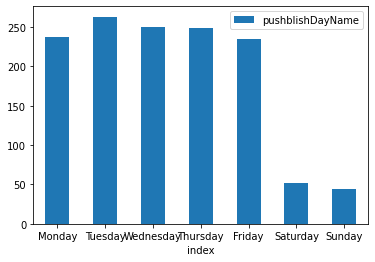

In [50]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)

In [51]:
def get_channel_stats(youtube, channel_ids):
    
    """
    Get channel stats
    
    Params:
    ------
    youtube: build object of Youtube API
    channel_ids: list of channel IDs
    
    Returns:
    ------
    dataframe with all channel stats for each channel ID
    
    """
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    # loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        all_data.append(data)
        
    return(pd.DataFrame(all_data))

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids
    
    
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)